In [1]:
try:
  %tensorflow_version 2.x
except:
  pass

TensorFlow 2.x selected.


In [12]:
!pip install tensorflow==2.0.0-rc0
!pip install plotly
!pip install cufflinks

     |████████████████████████████████| 81kB 2.7MB/s 
  Created wheel for cufflinks: filename=cufflinks-0.16-cp36-none-any.whl size=67603 sha256=e4660522d8f45e09667cb7936a5b38de56805538c037b0fde3783a85773df3db
  Stored in directory: /root/.cache/pip/wheels/8d/5a/6f/c97d47dc901071611809eb61aaa477d50a60692dc764dca622
Successfully built cufflinks


In [20]:
!pip install plotly==3.1.0

     |████████████████████████████████| 30.3MB 25.5MB/s 
  Created wheel for plotly: filename=plotly-3.1.0-cp36-none-any.whl size=36867540 sha256=ca3403bef9939334633f3a95525824bea13fe870cfcc62d284d2208708cee72c
  Stored in directory: /root/.cache/pip/wheels/9f/8c/a4/a1a26a9a0ac42d852e0fb4b0ba021cc6b881aab075d03e903b
Successfully built plotly


In [2]:
%%time
from __future__ import absolute_import, division, unicode_literals, print_function
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.datasets import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
tf.__version__

from sklearn.model_selection import *
from sklearn.metrics import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})

import os
import gc
gc.enable()
import math
import glob
import random
import subprocess

import warnings
warnings.filterwarnings("ignore")

print(os.listdir())
print("Done.!")

['.config', 'sample_data']
Done.!
CPU times: user 1.77 s, sys: 166 ms, total: 1.93 s
Wall time: 1.95 s


In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

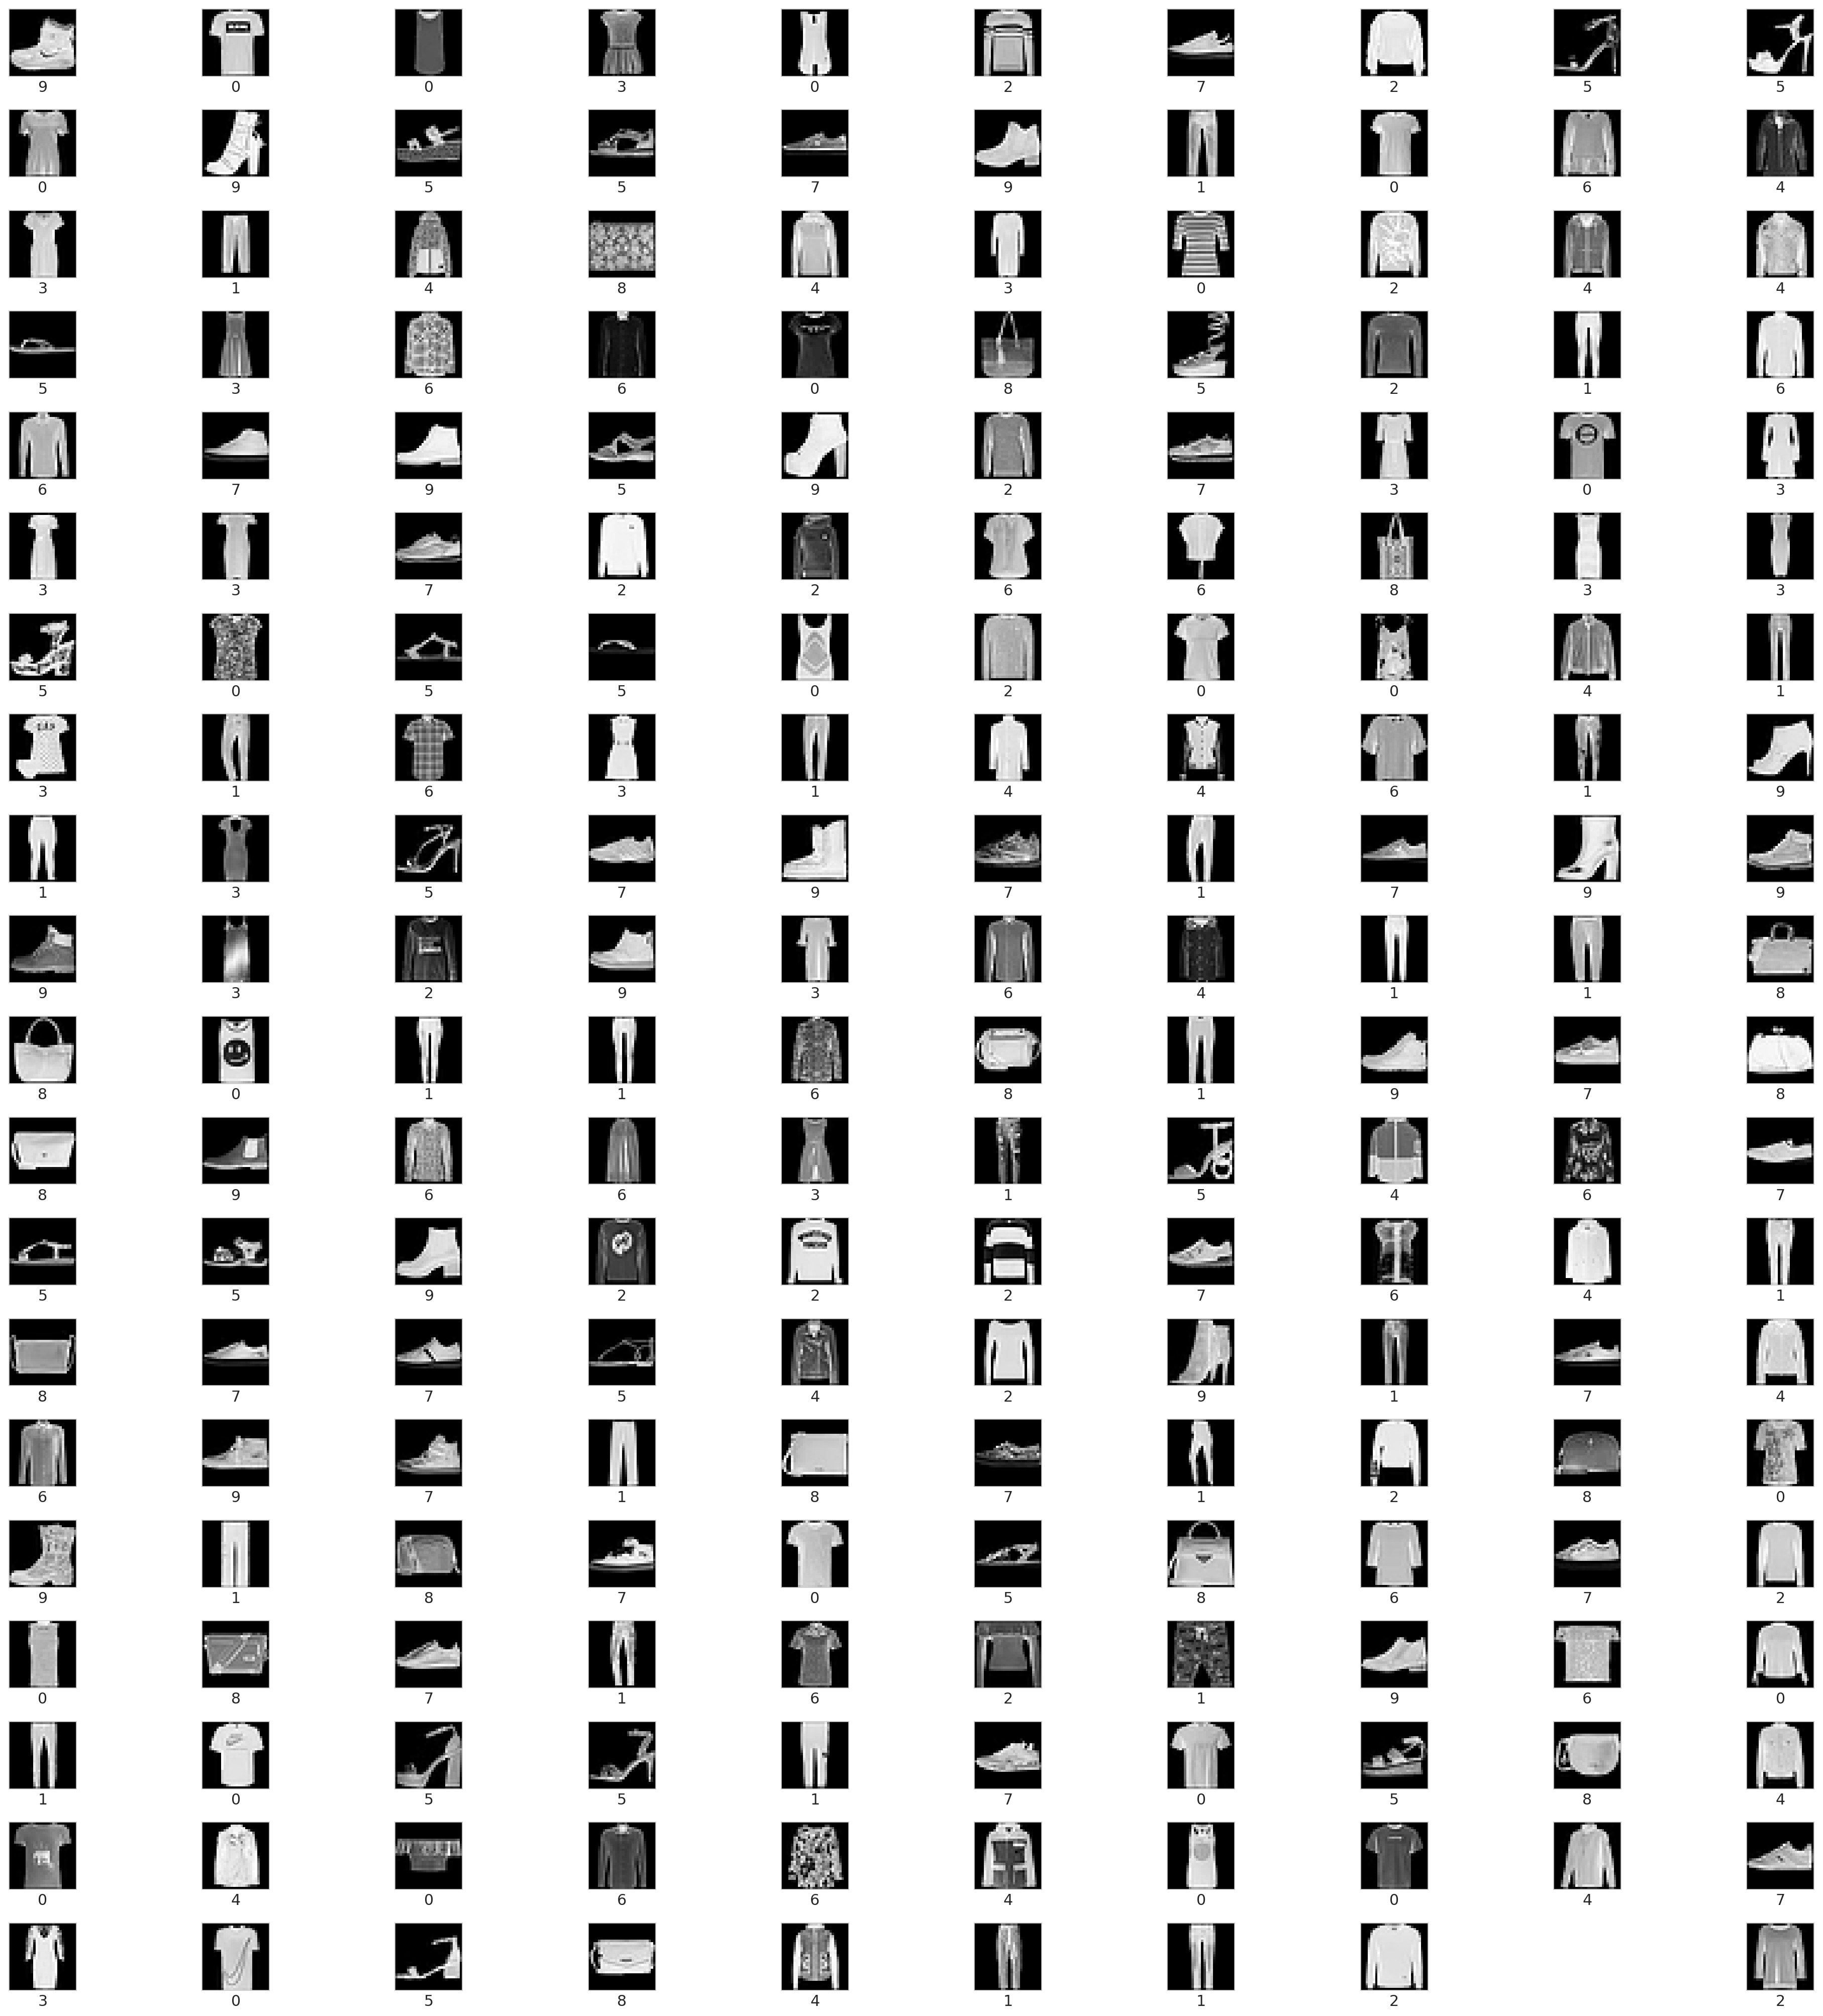

In [0]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,20))
for i in range(200):
  plt.subplot(20,10,i+1)
  plt.imshow(X_train[i,:,:], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.xlabel(y_train[i],fontsize=15)
  plt.tight_layout()
plt.show()

In [0]:
from tensorflow.keras.utils import *

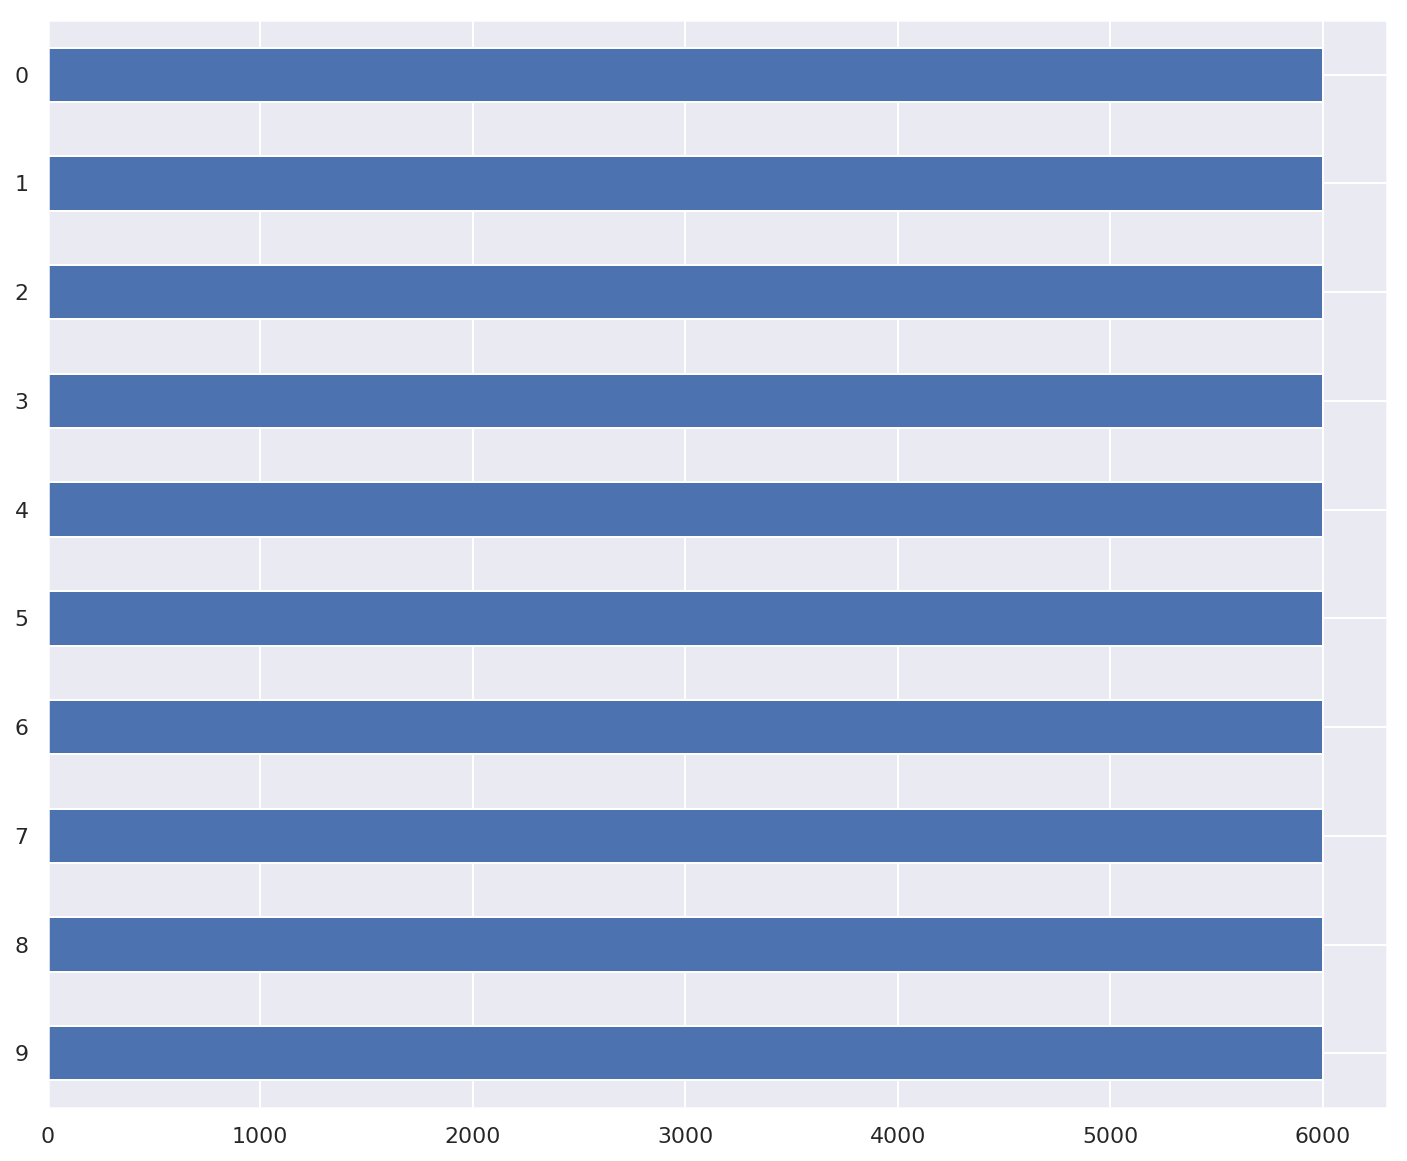

In [22]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

y_train_copy = pd.DataFrame(y_train, columns=["y_true"])
y_train_copy["y_true"].value_counts().plot(kind="barh")

y_train, y_test = to_categorical(y_train), to_categorical(y_test)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [0]:
model_name = 'model_custom_base.h5'
early_stopping = EarlyStopping(monitor="val_loss",verbose=1,patience=5,restore_best_weights=True)
checkpoint = ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
reduce_lr_on_plateau = ReduceLROnPlateau(monitor = 'val_loss',patience = 3, factor=0.5, verbose=1)

In [0]:
def custom_nn():
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer="glorot_uniform"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation='relu', kernel_initializer="glorot_uniform"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(Adam(0.001), "categorical_crossentropy", ["accuracy"])

  model.summary()

  return model

In [33]:
model = custom_nn()

datagen = ImageDataGenerator(featurewise_center=False,  
                               samplewise_center=False,  
                               featurewise_std_normalization=False,  
                               samplewise_std_normalization=False,  
                               zca_whitening=False,  
                               rotation_range=10,  
                               zoom_range = 0.1, 
                               width_shift_range=0.1,  
                               height_shift_range=0.1,  
                               horizontal_flip=False,  
                               vertical_flip=False)

datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, 
                      y_train,
                      batch_size=512),
                      epochs=40,  
                      steps_per_epoch=X_train.shape[0] // 128, 
                      validation_data = (X_val,y_val),
                      verbose=2,
                      callbacks = [early_stopping, reduce_lr_on_plateau, checkpoint])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)               

In [34]:
hist = pd.DataFrame(history.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.813573,0.701475,0.539866,0.802500,0.001
1,0.632767,0.762251,0.473700,0.825583,0.001
2,0.594196,0.776639,0.458654,0.819250,0.001
3,0.571363,0.785271,0.445362,0.830250,0.001
4,0.556464,0.790384,0.441228,0.828917,0.001


In [0]:
def plot(history):

  plt.subplot(2,1,1)
  plt.plot(history["loss"],marker='o',label="Training Loss")
  plt.plot(history['val_loss'],marker='o',label="Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.plot(history["accuracy"],marker='o',label="Training Accuracy")
  plt.plot(history['val_accuracy'],marker='o',label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()

  plt.tight_layout()

  plt.show()


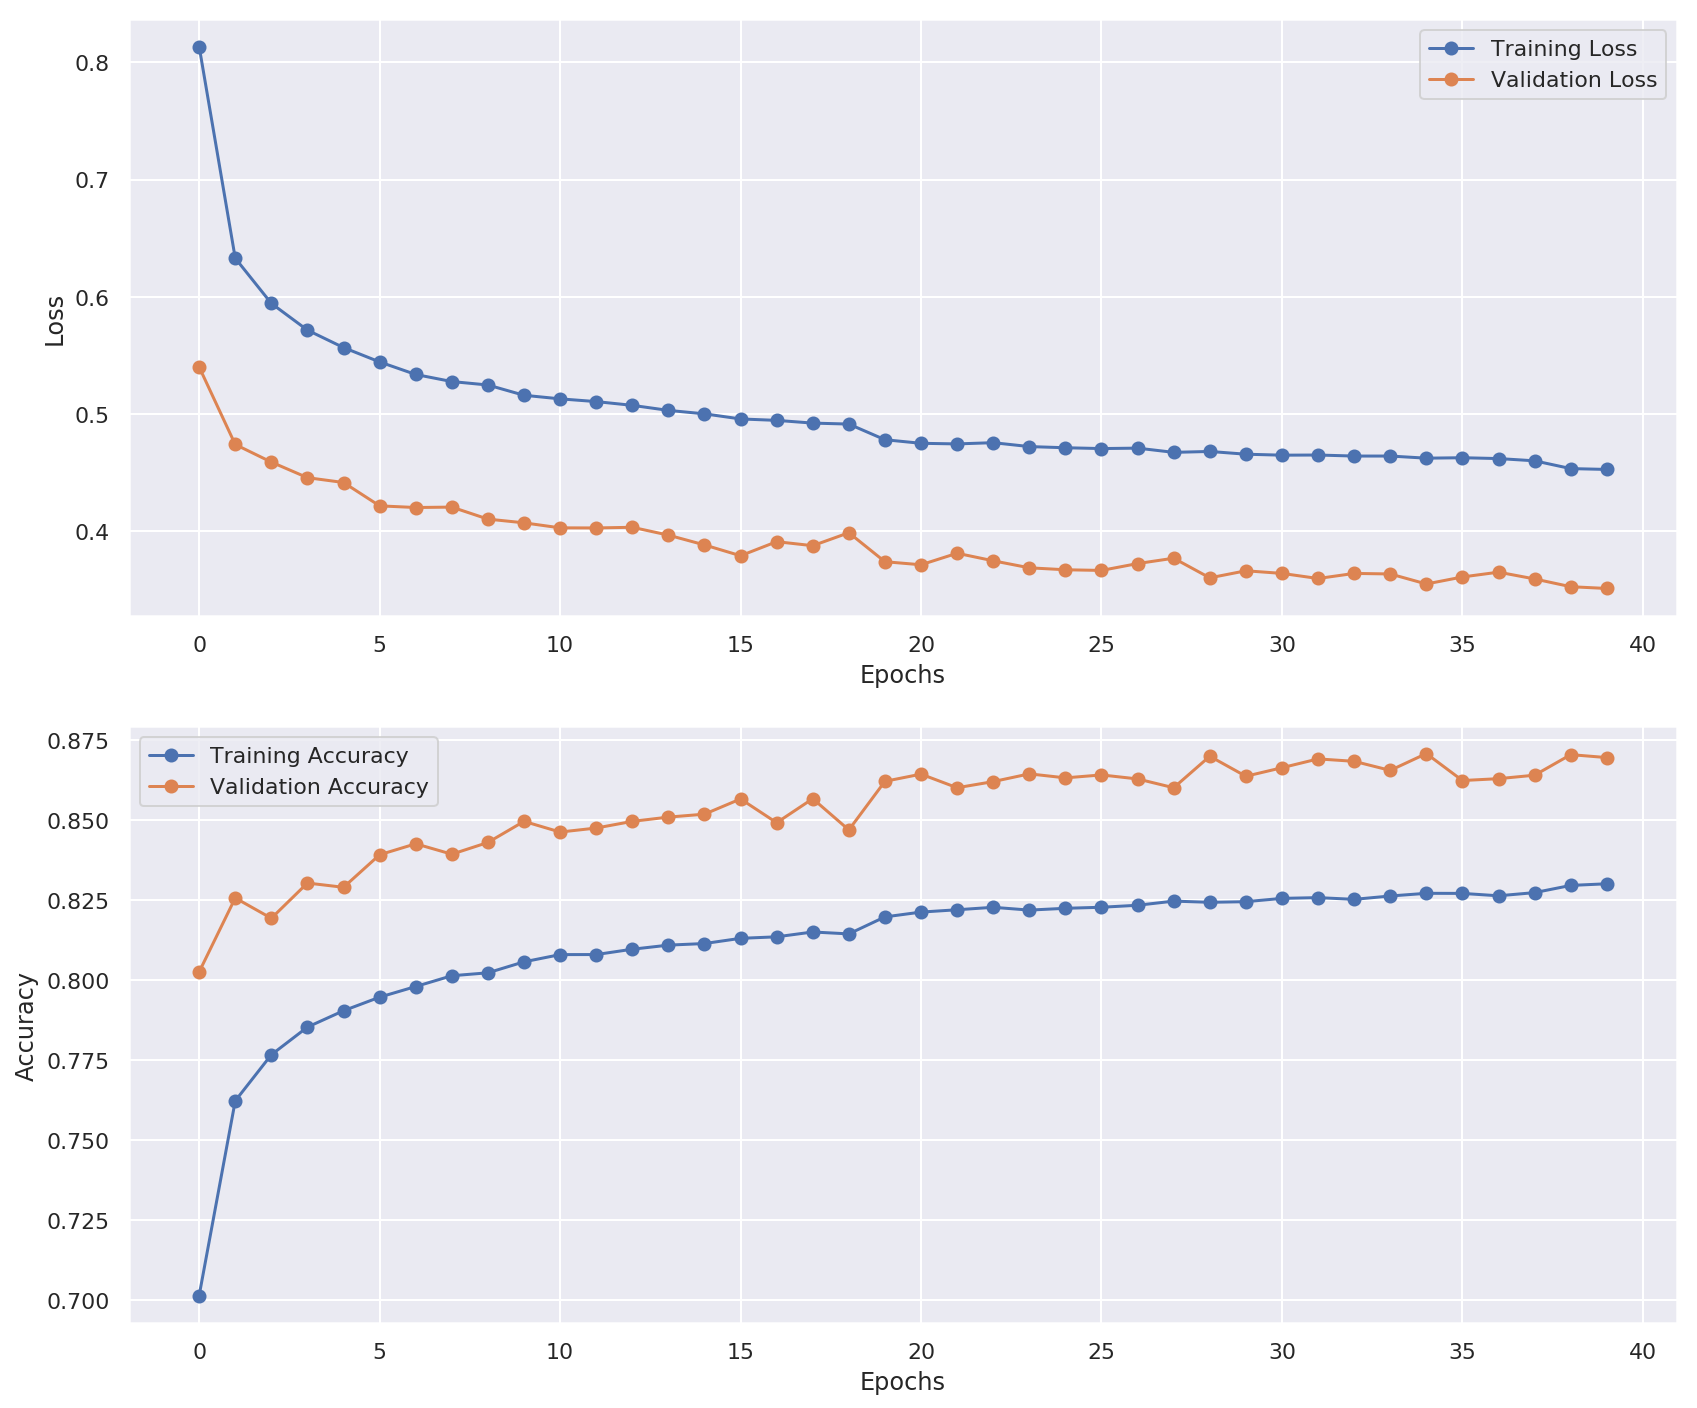

In [38]:
plot(hist)

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [41]:
print("Test loss: ", np.round(test_loss,2), " Test acc: ", np.round(test_acc*100,2))

Test loss:  0.36  Test acc:  86.37


In [0]:
predictions = model.predict(X_test)

In [52]:
np.argmax(predictions[0])

9

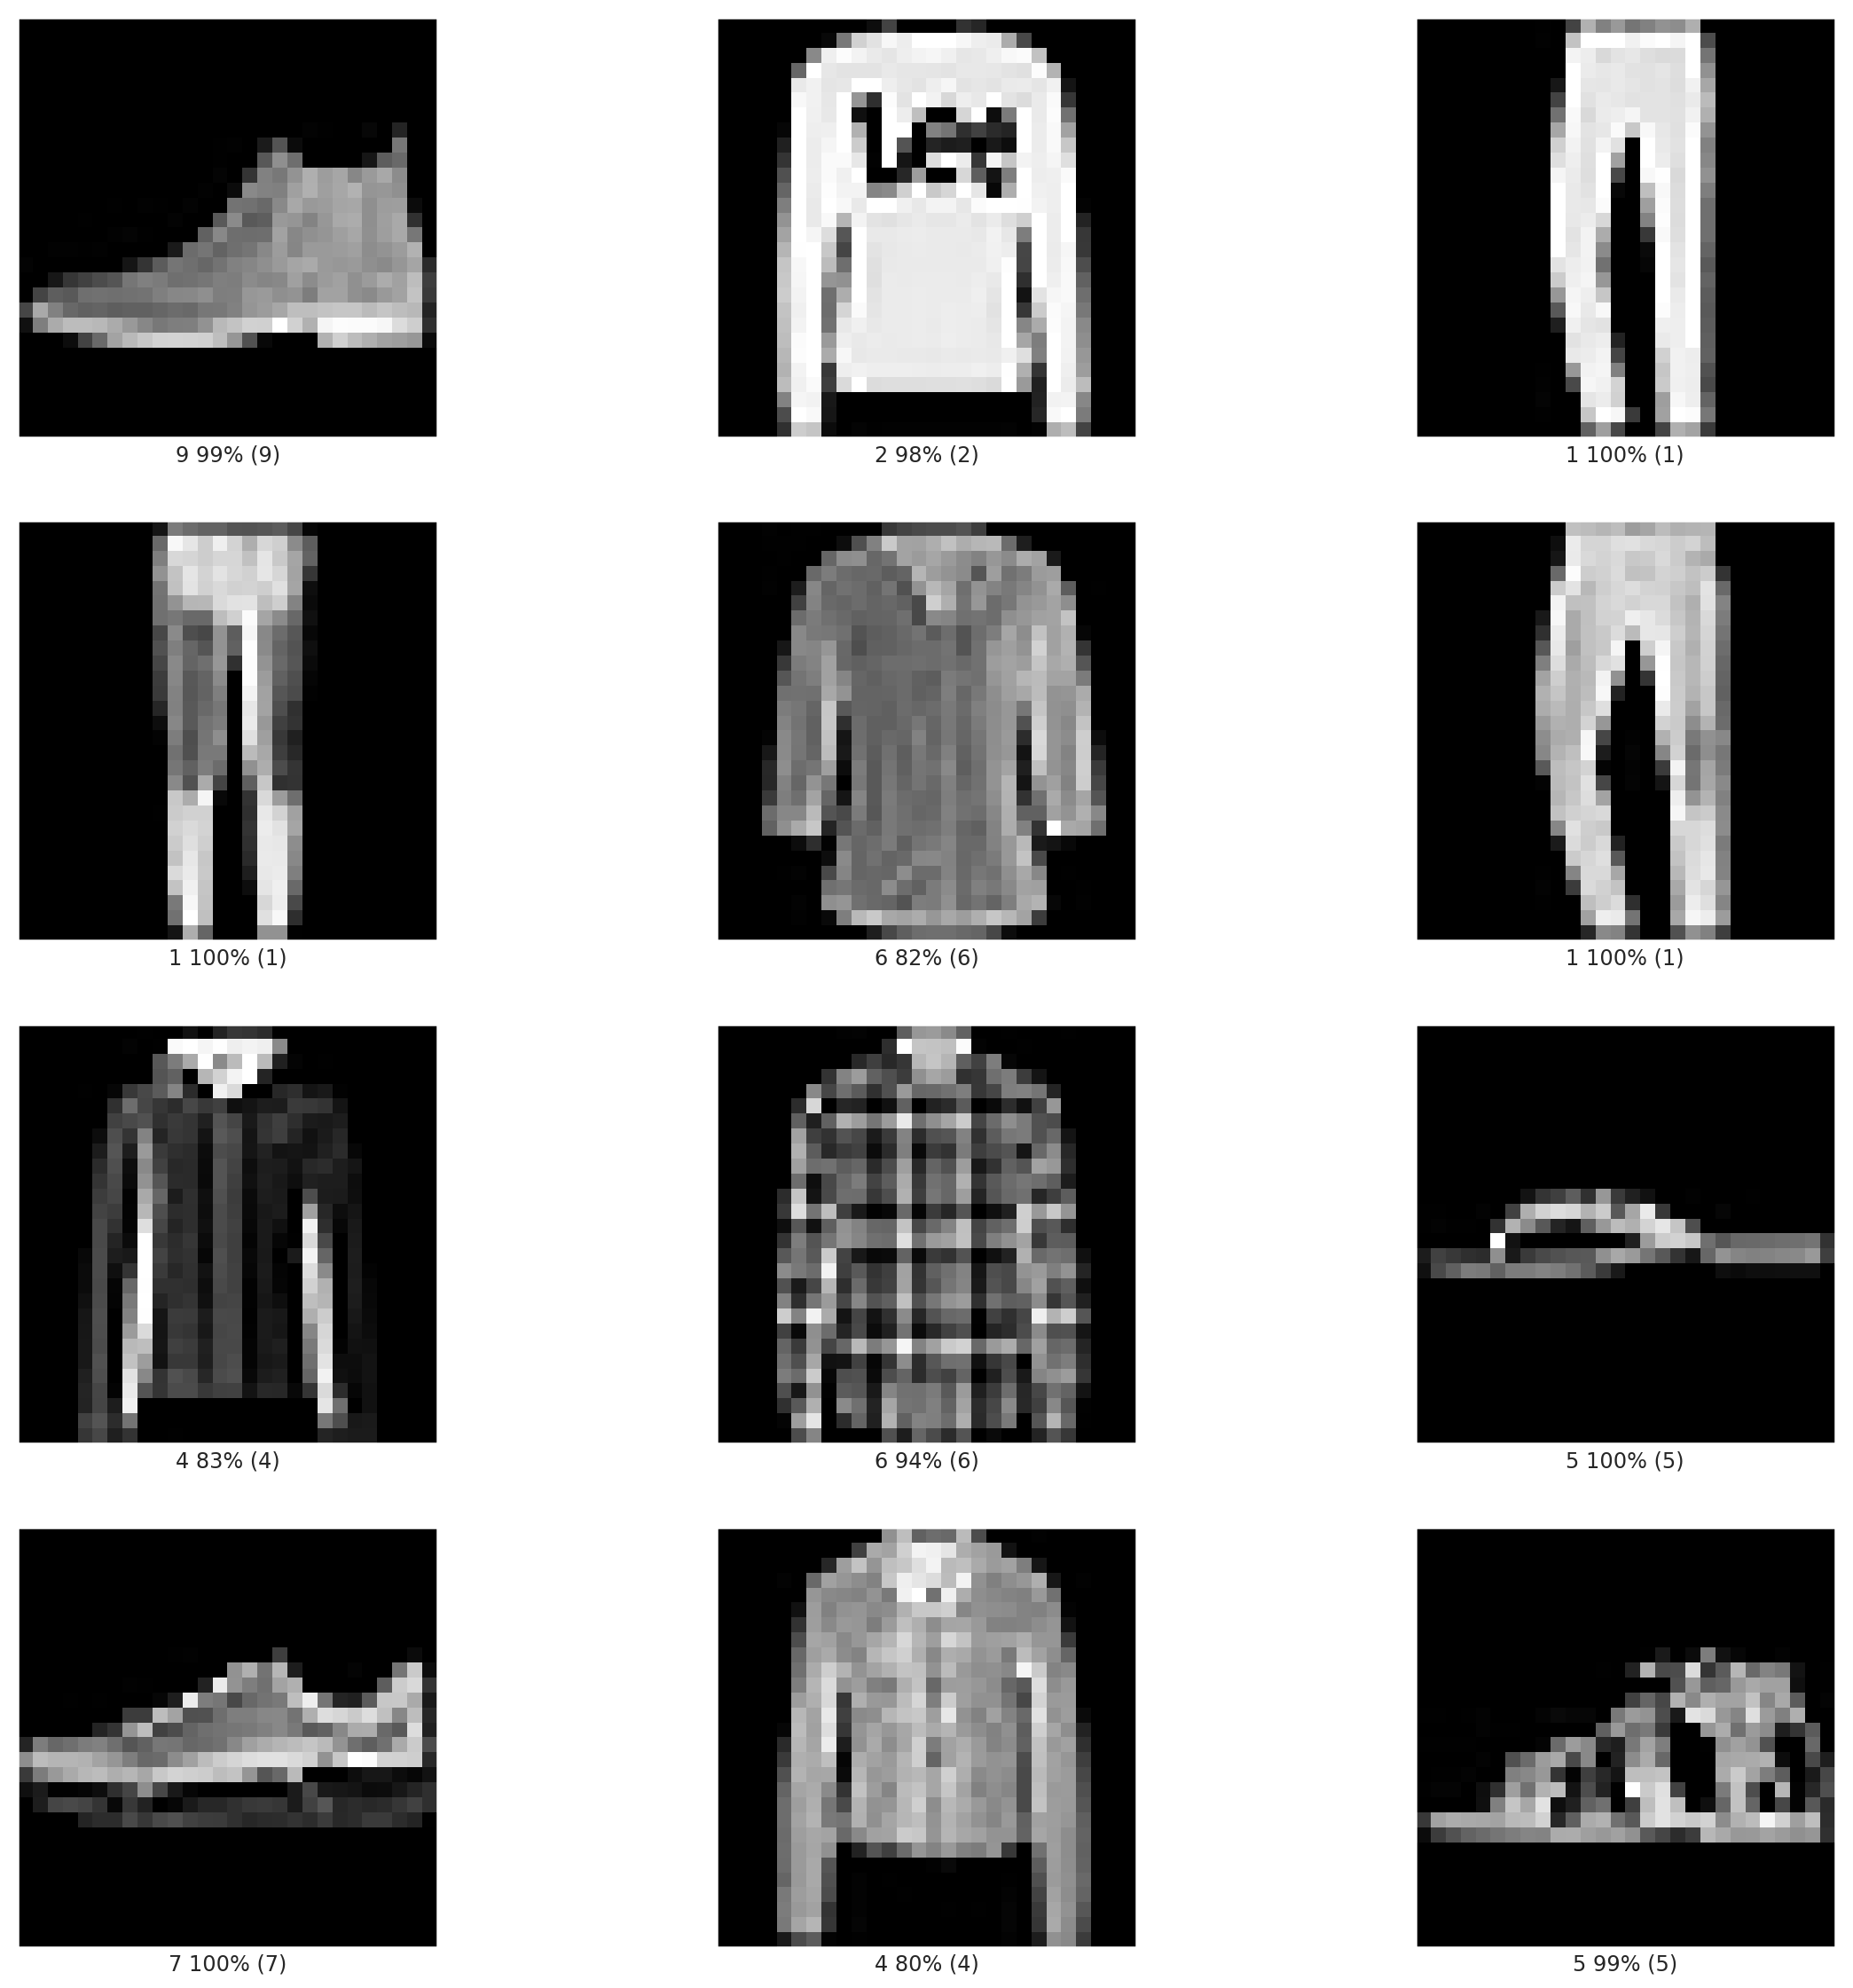

In [59]:
plt.figure(figsize=(20,20))
for idx in range(12):
  plt.subplot(4,3,idx+1)
  pred, true_label, img = predictions[idx], y_test[idx], X_test[idx,:,:,:]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.squeeze(img),cmap="gray")
  pred_label = np.argmax(pred)
  if pred_label == np.argmax(true_label):
    color="blue"
  else:
    color="red"
  plt.xlabel("{} {:2.0f}% ({})".format(pred_label, 100*np.max(pred),np.argmax(true_label),color=color))